# Homework 1: Probability Distributions and Maximum Likelihood

## Question 1: Probability

#### a) Suppose that we know the following probabilities about tomorrow's weather:
$P(\textrm{sunny}) = 0.5$

$P(\textrm{windy}) = 0.3$

$P(\textrm{sunny} \cap \textrm{windy}) = 0.1$

You're planning a big ski outing with your friends and know that it's going to be sunny. Given that it will be sunny tomorrow, what is the probability that it will _not_ be windy? 

**Answer Here**
$P(\textrm{not windy | sunny}) = 1 - P(\textrm{windy|sunny}) = 1 - \frac{P(\textrm{sunny}\cap \textrm{windy})}{P(\textrm{sunny})} = 1 - .1/.5= 4/5$

##sunny given windy 

#### b) You are given two bags of colored balls, one has 75% red balls and 25% green balls, and the other has 75% green balls and 25% red balls.

##### i) You take a bag at random, what is the probability you chose the bag with more red balls?

**Answer Here**
P=1/2

##### ii) Now you reach in and at random draw a red ball out of the bag - what is the probability you have the bag with more red balls?

**Answer Here**Let Bag A be the bag with more red balls and Bag B be the bag with less red balls.
$P(\textrm{Bag w/ more red | red ball}) = \frac{P(\textrm{Bag A, Red Ball})}{P(Red Ball)}= \frac{(1/2)(3/4)}{(1/2)(3/4) + (1/2)(1/4)}= 3/4 $

In [2]:
num = (1/2)*(3/4)
den = num + (1/2)*(1/4)
prob = num/den
prob

0.75

#### c) $X_1, X_2, \dots, X_k$ are all distributed Uniform(0, 1). Find the distribution of $$Y = \sum_{i=1}^{k} -\log(X_i)$$.

**Answer Here**
$$P(-\log(X_i)<a) = P(X>e^{-a}))= 1-P(X<e^{-a}) = 1 - \int_{0}^{e^{-a}}dx = 1-e^{-a}=F_X(a)$$
therefore $$X \sim exp(1)$$
and since a sum of n exponential random variables is a gamma(n, beta) we have $$ Y \sim \Gamma(n, 1)$$ 

## Question 2: The Normal Distribution with Known Variance

Suppose that you measure the heights of 6 maple trees, and find them to be 26, 28, 29, 31, 34, and 37 meters tall (we'll say your data is $\mathbf x  = [28, 28, 29, 31, 34, 37]$). You know that maple tree height is normally distributed with a variance of 5 meters, but you don't know the mean.

#### a) Write down the likelihood and log-likelihood (up to a constant) of the mean parameter of the height distribution as a function of your sampled data.

**Answer Here**
$ \ell({\mu ; \sigma^2, \vec{x}}) = (10\pi)^{-3} \prod_{i=1}^{6} \exp{(\frac{-1}{2}(\frac{x_i - \mu}{\sqrt{5}})^2)} $


$ -log({\ell({\mu ; \sigma^2, \vec{x}})}) = 3log(10\pi) + 1/2\sum_{i=1}^{6}(\frac{x_i-\mu}{\sqrt{5}})^2$

#### b) Plot the (negative) log-likelihood as a function of $\mu$ ranging from 25 to 35

Below the plot explain in words what the resulting curve represents.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:


data = np.array([26, 28, 29, 31, 34, 37])
mu = np.linspace(25, 35, 100)

def nll_norm(mus):
    return np.array([3*np.log(10*np.pi) + 1/2 * np.sum(((data - mu_)/np.sqrt(5))**2) for mu_ in mus])


                                   
nlls = nll_norm(mu)

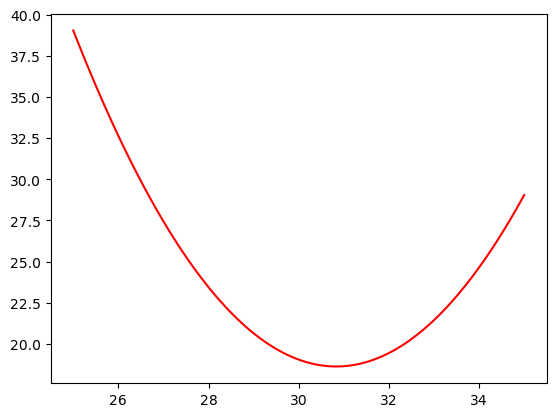

In [5]:
plt.plot(mu, nlls, 'r')
plt.show()

**Answer Here**
The curve represents the -log likelihood of the data as a function of mu. Since the parameter $\sigma^2$ is known, we can use this to optimize the likelihood function in terms of mu. 

#### c) Find (analytically) the MLE of the mean height of maple trees and compute the estimate for our data.

**Answer Here**
$$ \frac{\partial{(-\log({\ell{\mu; \sigma^2, \vec{x}}})})}{\partial{\mu}} = -\frac{1}{\sqrt{5}}\sum_{i=1}^{6}x_i - \mu$$
$$0 = -\frac{1}{\sqrt{5}}\sum_{i=1}^{6}x_i - \mu = -\frac{1}{\sqrt{5}}\sum_{i=1}^{6}x_i + \frac{6\mu}{\sqrt{5}}$$
$$\mu = \frac{1}{6} \sum_{i=1}^{6} x_i = \bar X$$
$$\hat\mu = 30.83$$

#### d) Estimate the MLE numerically

Use a numerical method to minimize your negative log-likelihood function with an initial guess of 25 --- does your result agree with your answer above?

Plot the negative log-likelihood along with the iterations of your optimizer.

In [6]:
def nll_norm_objective(par):
    return 3*np.log(10*np.pi) + 1/2 * np.sum(((data - par)/np.sqrt(5))**2)
    

In [7]:
def callbackF(Xi):
    print(Xi)

In [8]:
from scipy import optimize

In [9]:

output = optimize.minimize(nll_norm_objective, x0=25, options ={'return_all':True})
nll_min = output['x']

In [10]:
nll_min

array([30.83333394])

In [11]:
iterations = output['allvecs']

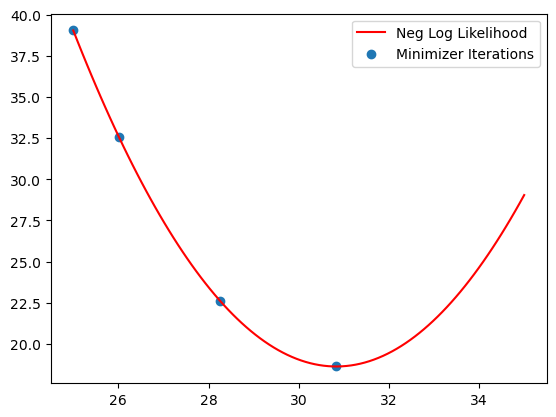

In [12]:
plt.plot(mu, nlls,'r', label='Neg Log Likelihood')
plt.scatter(iterations, nll_norm(iterations), label="Minimizer Iterations")
plt.legend()
plt.show()

**Answer Here**
The numerical results and analytic results are the same 

## Question 3: The (Biased) Coin

Your friend shows you a very odd looking coin, and you two want to figure out if it is biased or not.

#### a) The Observation Model

Assume you flip the coin $N$ times and get $n_h$ heads and $n_t = N - n_h$ tails. Choose an appropriate distribution and down the likelihood for $p$, the probability of flipping a heads with this coin.

**Answer Here** Let X be a random variable representing the number of heads after N trials, then X~Bin(N, p)
$$ \ell{(p; N, \vec{x})} = {N \choose n_h}p^{n_h}(1-p)^{N-n_h}$$

#### b) Use the log-likelihood to find a formula for the MLE for $p$. 

Provide an interpretation for this result.

**Answer Here**
$$ \frac{\partial{log(\ell{(p; N, \vec{x})})}}{\partial{p}} = log({N \choose n_h}) + n_hlog(p) + (N-n_h)log(1-p)$$
$$\hat{p} = \frac{n_h}{N} $$

The MLE provides us with an estimate of the probability that is exactly the number of occurences of heads over the total number of samples. 

#### c) An Interesting Case

Suppose you flip the coin 3 times and observe HHH (3 heads in a row). What is the MLE for $p$? Does this make sense with your intuitions?

**Answer Here** If the coin is flipped 3 times the MLE will be $\hat{p}=1$. From the perspective of the MLE this is the probability that would most likely produce the 3 heads. From the perspective of trying to maximize a function, this makes sense, but this is simply becuase the optimization by definition is a single point, ie. there is no uncertainty accounted for in the estimate. I would be very suspicious of an estimate this certain. 

## Question 4: Rainfall and a Joint MLE

We have a (synthetic) dataset of 1000 days of positive precipitation in measured in NYC in mm, attached in the `rain.npy` file. In this question we will work through modeling this data analytically and numerically, and simulating new data to determine risks for the city.

#### a) The Likelihood Function

Assuming a Gamma distribution, write down the likelihood and log likelihood functions of the shape and scale parameters. Solve for the MLE of the shape and scale parameters. You can leave your answer for the shape parameter in terms of the Digamma function.

**Answer Here**
$$\ell{(\theta, k; \vec{x})} = \frac{1}{\Gamma(k)^N\theta^N}\prod_{i=1}^{N}x_i^{k-1}e^{\frac{-x}{\theta}}$$
$$log(\ell{(\theta, k; \vec{x})}) = -N(log(\Gamma(k)) -Nklog(\theta) + \sum_{i=1}^{N}(k-1)log(x_i) - \frac{x_i}{\theta}$$
$$\frac{\partial{(log(\ell{(\theta, k; \vec{x})}))}}{\partial{\theta}}=-\frac{Nk}{\theta} + \frac{1}{\theta^2}\sum_{i=1}^{N}x_i$$
$$\hat{\theta} = \frac{1}{Nk}\sum_{i=1}^{N}{x_i}$$
Substituting in $\hat{\theta}$ and again maximizing the likelihood
$$\frac{\partial{(log(\ell{(\theta, k; \vec{x})}))}}{\partial{k}} =  N\log(N) + N\log(k)-N\psi{(k)} -N\log(\sum_{i=1}^{N}x_i)+\sum_{i=1}^{N}\log{(x_i)}$$
$$\log(k)- \psi(k)=\log(\frac{1}{N}\sum_{i=1}^{N}x_i)-\frac{1}{N}\sum_{i=1}^{N}\log(x_i)$$

#### B) Joint optimization of the MLE

In the previous part we saw that we can't get a closed form for the joint MLE of the Gamma distribution (hint hint!). For this part (i) define a function for the _negative_ log likelihood and make a surface plot for values of $k \in [1., 15]$ and $\theta \in [1., 15]$ using the attached data.

**Answer Here**

In [13]:
from scipy.special import gamma

In [15]:
rain = np.load("rain.npy")

In [16]:
def nll_gamma(k, theta):
    return 1000*np.log(gamma(k))+1000*k*np.log(theta)-(k-1)*np.sum(np.log(rain))+1/theta*np.sum(rain)

In [17]:
k_ = np.linspace(1,15, 1000)
theta_ = np.linspace(1,15, 1000)
k_grid, theta_grid = np.meshgrid(k_,theta_)

In [18]:
nlls_gamma = nll_gamma(k_grid, theta_grid)

#### C) Numerical Estimates

Since we can't get a closed form estimate but we can define a negative log-likelihood function in python, use `scipy.minimize` to compute estimates of $k$ and $\theta$.

Plot the solution of the optimizer on the surface plot of the NLL you generated above - does it seem reasonable? 

In [18]:
def nll_gamma_objective(param):
    k = param[0]
    theta=param[1]
    return 1000*np.log(gamma(k))+1000*k*np.log(theta)-(k-1)*np.sum(np.log(rain))+1/theta*np.sum(rain)#1000*np.log(gamma(param[0]))+1000*param[0]*np.log(param[1])-(param[0]-1)*np.sum(np.log(rain))+np.sum((rain/param[1]))

In [19]:
nll_gamma_opt = optimize.minimize(nll_gamma_objective,x0=[15.0, 15.0], bounds=((1.0, 15.0),(1.0, 15.0)))
k_theta = nll_gamma_opt['x']


In [20]:
k_theta

array([10.11810938,  6.01379631])

In [21]:
nll_gamma_min=nll_gamma_objective(k_theta)

In [19]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot_surface(k_grid, theta_grid, nlls_gamma, alpha=0.5)
ax.scatter(k_theta[0], k_theta[1], nll_gamma_min, color='red')
ax.set_xlabel(r'k')
ax.set_ylabel(r'$\theta$')
ax.set_zlabel('NLL')
ax.view_init(10, 15)
plt.show()

NameError: name 'k_theta' is not defined

**Answer Here**
The solution here seems very reasonable as it sits at the valley of the surface.

#### D) Risk Projection

We now have a model of rainfall in NYC! Suppose that any day where it rains over 100mm is a rain event for which the city's flood resources become stressed. Simulate 100,000 days of rainfall with your model - how many times do you see over 100mm of rain? How worried should city officials be? 

In [25]:
from scipy.stats import gamma

In [26]:
fit_gamma =gamma(k_theta[0], scale = k_theta[1])

In [27]:
r = fit_gamma.rvs(size=100000)

In [28]:
over_100 = len(np.where(r > 100)[0])
percent_over100 = over_100/100000

In [29]:
percent_over100, over_100

(0.0338, 3380)

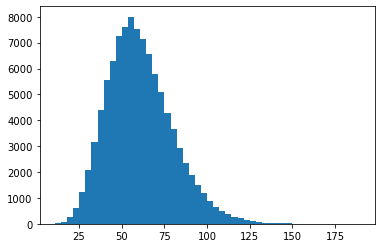

In [30]:
plt.hist(r, bins=50)
plt.show()

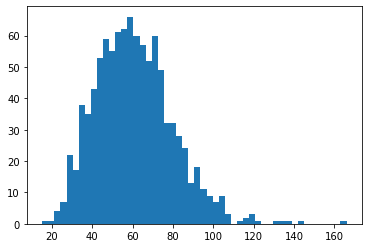

In [31]:
plt.hist(rain, bins=50)
plt.show()

**Answer Here**
Over 100mm of rainfall occurs on 3377 days, which comprises around 3% of all days. They shouldn't be that worried, but then again I don't know what the quality of the flood resources are like.

## Question 5: Consistency of Regression Models

Suppose we have a collection of data $\mathcal{D} = \left\{(x_i, y_i) \right\}_{i=1}^{n}$ and we want to learn the regression model
$$
y = ax + \epsilon
$$
with $\epsilon \sim N(0, \sigma^2)$.

### a) The Log Likelihood

Derive the log likelihood for the whole dataset, $\log p(\mathbf{y} | \mathbf{x}, a , \sigma^2)$

**Answer Here**
$$-\log{\ell(a, \sigma^2|\mathbf{y},\mathbf{x})} = n\log{(\sigma)} + \frac{n}{2}\log(2\pi) + \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - ax_i)^2$$

### b) The MLE for $a$

Now find the MLE for $a$.

**Answer Here**
$$-\frac{\partial{\log{\ell(a, \sigma^2|\mathbf{y},\mathbf{x})}}}{\partial{a}} = \frac{1}{\sigma^2}\sum_{i=1}^{n}y_ix_i-ax_ix_i$$
$$\frac{1}{\sigma^2}\sum_{i=1}^{n}y_ix_i - a\sum_{i=1}^{n}x_ix_i = 0$$
$$\frac{a}{\sigma^2}\sum_{i=1}^{n}x_ix_i = \frac{1}{\sigma^2}\sum_{i=1}^{n}y_ix_i$$
$$\hat a = \frac{\sum_{i=1}^{n}y_ix_i}{\sum_{i=1}^{n}x_ix_i}$$

### c) A new MLE

Suppose we instead consider the model
$$
x = by + \epsilon
$$

Is the maximum likelihood solution $b=1/a$? Explain why.


TODO

$$-\frac{\partial{\log{\ell(b, \sigma^2|\mathbf{y},\mathbf{x})}}}{\partial{b}}=\frac{1}{\sigma^2}\sum_{i=1}^{n}(x_iy_i - by_iy_i)$$
$$\frac{1}{\sigma^2}\sum_{i=1}^{n}x_iy_i - \frac{1}{\sigma^2}\sum_{i=1}^{n}by_iy_i=0$$
$$\sum_{i=1}^{n}x_iy_i = \sum_{i=1}^{n}by_iy_i$$
$$b = \frac{\sum_{i=1}^{n}x_iy_i}{\sum_{i=1}^{n}y_iy_i}$$

**Answer Here**
They are in fact not equal to each other. This makes sense if we take the perspective 

## Question 6: Regularizing Regression

In this question we'll explore finding a regularization parameter $\lambda$ for a simple regression problem. First Load in the `regression_data.npz` file and extract the training and testing data.

### a) A simple linear model

Fit a linear regression to the training data of the form
$$
y = \sum_{i=0}^{10}\beta_i x^{i} + \epsilon
$$
with $\epsilon \sim N(0, \sigma^2)$.

Generate predictions on for the test inputs. Plot the model fit - how is it?

**Answer Here**`

In [6]:
data = np.load("regression_data.npz")

In [16]:
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

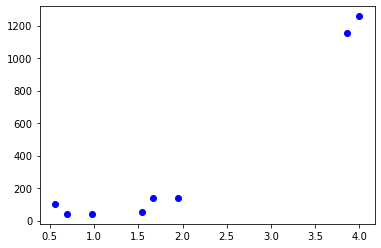

In [18]:
plt.plot(x_train, y_train, 'bo')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [35]:
x_train = x_train.reshape(1,-1).T
x_test = x_test.reshape(1,-1).T

In [103]:
y_train

array([1152.24076616,   41.1108484 ,  103.32421578,  140.44798617,
        137.26943969,   42.6576638 , 1257.47046278,   51.50954508])

In [60]:
transform = PolynomialFeatures(10)
x_train_poly = transform.fit_transform(x_train)
x_test_poly = transform.fit_transform(x_test)

In [100]:
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_hat = model.predict(x_test_poly)

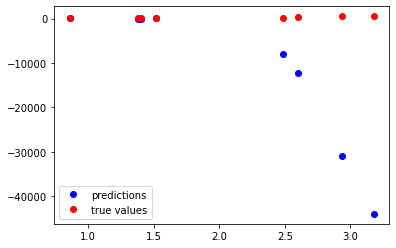

In [112]:
plt.plot(x_test_poly[:,1], y_hat, 'bo', label='predictions')
plt.plot(x_test, y_test, 'ro', label= 'true values')
plt.legend()
plt.show()

This model fits pretty horribly. It seems to be almost the reflection over the x axis of what we are looking for, which is honestly really weird considering there is not a single negative value in the y data set. 

**Answer Here**### b) Cross-Validation

Using leave one out cross validation find an optimal regularization parameter to use for a ridge regression by applying grid search for 10000 values of $\alpha \in [1, 500]$. 

What do you notice when you go to run your code?

**Answer Here**

In [6]:
from sklearn.linear_model import RidgeCV

In [47]:
alphas = np.linspace(1, 500, 10000)

In [99]:
ridge_model = RidgeCV(alphas)
ridge_model.fit(x_train_poly, y_train)

RidgeCV(alphas=array([  1.        ,   1.04990499,   1.09980998, ..., 499.90019002,
       499.95009501, 500.        ]))

In [1]:
ridge_model.alpha_

NameError: name 'ridge_model' is not defined


The model takes a sec to fit when it is run compared to the standard Linear Regression. 

### c) Now Use Your Cross-Validated Regularization Parameter to Generate Predictions. How Are they? 

In [104]:
y_ridge_hat = ridge_model.predict(x_test_poly)

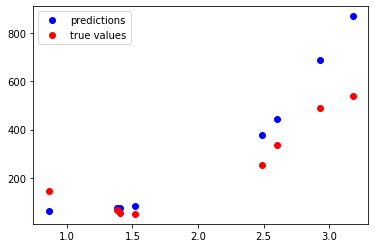

In [109]:
plt.plot(x_test, y_ridge_hat,'bo', label='predictions')
plt.plot(x_test, y_test, 'ro', label='true values')
plt.legend()
plt.show()

**Answer Here**
The predictions here are pretty impressive, at least compared to the poor performance of the previous model. 

## Question 7:  Linear Regression with a Prior

### a) Posterior distribution
Consider the linear model

$$
y_i = {\bf w}^T {\bf x}_i + \epsilon_i
$$

where the noise $\epsilon_i \sim N(0, \sigma^2)$ are i.i.d.  Our goal is to infer the weight vector ${\bf w} \in \mathbb{R}^p$ given $n$ training data points $\{({\bf x}_i, y_i)\}_{i=1}^n$.  Assume the prior distribution over ${\bf w}$ is a multivariate Gaussian distribution $N({\bf v}, {\boldsymbol \Gamma})$ where ${\bf v} \in \mathbb{R}^p$ and ${\boldsymbol \Gamma}\in \mathbb{R}^{p\times p}$.  Denote the training data matrix ${\bf X} = [{\bf x}_1, \ldots, {\bf x}_n]^T \in \mathbb{R}^{p\times n}$ and the vector of training labels ${\bf y} = [y_1,\ldots,y_n]^T \in \mathbb{R}^n$.



Derive the posterior distribution $p({\bf w} | {\bf X}, {\bf y})$ (up to a normalizing constant that doesn't depend on ${\bf w}$) for the parameters ${\bf w}$ given the $n$ training points.

**Answer Here**
$$P(\mathbf{w}|\mathbf{X, y}) = P(\mathbf{y}|\mathbf{X,w})P(\mathbf{w})$$
Here the X's are given so the equation $P(\mathbf{y}|\mathbf{X,w})$ really could be written $P(\mathbf{y(X)}|\mathbf{w})$
$$P(\mathbf{w}|\mathbf{X,y}) \propto \exp(-\frac{1}{2}(\mathbf{w - v})^T)(\gamma \mathbf{I})^{-1}(\mathbf{w - v}) - \frac{1}{2}(\mathbf{y} - \mathbf{w^TX})(\sigma^2 \mathbf{I})^{-1}(\mathbf{y}-\mathbf{w^TX}))$$

### b) MAP estimation vs. loss minimization

Recall that for linear regression we are minimizing a loss function

$$
L({\bf w}) = \sum_{i=1}^n ({\bf w}^T {\bf x}_i - y_i)^2
$$

and that this corresponds to maximizing the log-likelihood $\log p({\bf y}|{\bf X},{\bf w})$.  Answer the following two questions:

1.  Show that minimizing the regularized loss function

$$
L_{\lambda}({\bf w}) = \lambda \|{\bf w} - {\bf v}\|^2 + \sum_{i=1}^n ({\bf w}^T {\bf x}_i - y_i)^2
$$

corresponds to finding the maximizer of the posterior distribution (maxiumum a posteriori or MAP estimator)

$$
{\bf w}^* = \underset{{\bf w} \in \mathbb{R}^p}{\mathrm{argmax}}\ p({\bf w} | {\bf X} , {\bf y})
$$

when the prior distribution for ${\bf w}$ is a Gaussian $N({\bf v}, {\gamma^2} {\bf I})$, where ${\bf I} \in \mathbb{R}^{p\times p}$ is the identity matrix and $\gamma > 0$.  

2.  What is the relation between $\lambda$, $\sigma^2$, and $\gamma^2$?  In particular, what does mean for the loss function if the prior distribution is very concentrated around the mean ${\bf v}$ (i.e. $\gamma$ is close to 0)?

**Answer Here**



1. 
Minimizing the loss function 
$$L_\lambda(\mathbf{w}) = \lambda(\mathbf{w}- \mathbf{v})^T(\mathbf{w}- \mathbf{v}) + (\mathbf{y}-\mathbf{X^Tw})^T(\mathbf{y}-\mathbf{X^Tw})$$
$$\frac{\partial{L_\lambda(\mathbf{w})}}{\partial{\mathbf{w}}} = 2\lambda(\mathbf{w}- \mathbf{v}) - 2\mathbf{X}(\mathbf{y}-\mathbf{X^Tw})$$
$$2\lambda(\mathbf{w}- \mathbf{v}) - 2\mathbf{X}(\mathbf{y}-\mathbf{X^Tw})= 0$$
$$\lambda(\mathbf{w}- \mathbf{v}) = \mathbf{X}(\mathbf{y}-\mathbf{X^Tw})$$
$$\lambda\mathbf{w}- \lambda\mathbf{v} = \mathbf{X}\mathbf{y}-\mathbf{X}\mathbf{X^Tw}$$
$$(\lambda\mathbf{I} + \mathbf{X}\mathbf{X^T})\mathbf{w} = \mathbf{X}\mathbf{y} + \lambda\mathbf{v}$$
$$ \mathbf{\hat{w}}= (\lambda\mathbf{I} + \mathbf{X}\mathbf{X^T})^{-1}(\mathbf{X}\mathbf{y} + \lambda\mathbf{v}) $$

Maximizing the posterior. Here it is convenient to work with the log of the posterior.
$$\log P(\mathbf{w} | \mathbf{X, y}) \propto -\frac{1}{2}(\mathbf{w - v})^T)(\gamma^2 \mathbf{I})^{-1}(\mathbf{w - v}) - \frac{1}{2}(\mathbf{y} - \mathbf{X^Tw})(\sigma^2 \mathbf{I})^{-1}(\mathbf{y}-\mathbf{X^Tw})$$

$$\frac{\partial{\log P(\mathbf{w} | \mathbf{X, y})}}{\partial{\mathbf{w}}} \propto - (\gamma^2 \mathbf{I})^{-1}(\mathbf{w - v}) + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}(\mathbf{y}-\mathbf{X^Tw}))$$
$$- (\gamma^2 \mathbf{I})^{-1}(\mathbf{w - v}) + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}(\mathbf{y}-\mathbf{X^Tw})) = 0$$
$$- (\gamma^2 \mathbf{I})^{-1}\mathbf{w} + (\gamma^2 \mathbf{I})^{-1}\mathbf{v} + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y}-\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^Tw})=0$$
$$ (\gamma^2 \mathbf{I})^{-1}\mathbf{w} + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^Tw} = (\gamma^2 \mathbf{I})^{-1}\mathbf{v}+\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y}$$
$$((\gamma^2 \mathbf{I})^{-1} + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^T})\mathbf{w} = (\gamma^2 \mathbf{I})^{-1}\mathbf{v}+\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y}$$
$$\mathbf{\hat{w}_{MAP}} = ((\gamma^2 \mathbf{I})^{-1} + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^T})^{-1}((\gamma^2 \mathbf{I})^{-1}\mathbf{v}+\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y})$$

From this we can see that the minimization of the Loss function is equivalent to the maximization of the posterior for regularization parameter  $\lambda = \frac{1}{\gamma^2}$ and the error being standard normal. When the prior is very concentrated around its mean the loss function approaches unregualarized regression


TODO: Better Answer 

### c) Deriving the MAP estimator

Derive the minimizer of the regularized loss function ${\bf w}^* = \underset{{\bf w} \in \mathbb{R}^p}{\mathrm{argmin}}\ L_{\lambda}({\bf w})$ by setting the gradient to be zero and solving.  Hint: your solution should be of the form ${\bf w} = {\bf A}^{-1}{\bf b}$ for some matrix ${\bf A}$ and some vector ${\bf b}$.

**Answer Here**
$$\log P(\mathbf{w} | \mathbf{X, y}) \propto -\frac{1}{2}(\mathbf{w - v})^T)(\gamma \mathbf{I})^{-1}(\mathbf{w - v}) - \frac{1}{2}(\mathbf{y} - \mathbf{X^Tw})(\sigma^2 \mathbf{I})^{-1}(\mathbf{y}-\mathbf{X^Tw})$$

$$\frac{\partial{\log P(\mathbf{w} | \mathbf{X, y})}}{\partial{\mathbf{w}}} \propto - (\gamma \mathbf{I})^{-1}(\mathbf{w - v}) + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}(\mathbf{y}-\mathbf{X^Tw}))$$
$$- (\gamma \mathbf{I})^{-1}(\mathbf{w - v}) + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}(\mathbf{y}-\mathbf{X^Tw})) = 0$$
$$- (\gamma \mathbf{I})^{-1}\mathbf{w} + (\gamma \mathbf{I})^{-1}\mathbf{v}) + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y}-\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^Tw})=0$$
$$ (\gamma \mathbf{I})^{-1}\mathbf{w} + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^Tw} = (\gamma \mathbf{I})^{-1}\mathbf{v}+\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y}$$
$$((\gamma \mathbf{I})^{-1} + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^T})\mathbf{w} = (\gamma \mathbf{I})^{-1}\mathbf{v}+\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y}$$
$$\mathbf{w_{MAP}} = ((\gamma \mathbf{I})^{-1} + \mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{X^T})^{-1}((\gamma \mathbf{I})^{-1}\mathbf{v}+\mathbf{X}(\sigma^2 \mathbf{I})^{-1}\mathbf{y})$$

### d) Polynomial interpolation

Now you'll implement Bayesian linear regression to fit a high degree polynomial to some noisy data.  Assume that $t_1,\ldots,t_{n}$ are points in the interval $[0,1]$ with $t_i \neq t_j$ for $i \neq j$.  

We wish to approximate some underlying function $f$ with prescibed values $f_i = f(t_i)$ by using polynomial interpolation.  It's a standard fact that we can perfectly interpolate the points using a polynomial of degree $n-1$ or more.  However, if there is noise in our data this will give very poor results.  In particular, we assume that we instead observe
$$
y_i = f_i + \epsilon_i
$$
where the noise $\epsilon_i$ are i.i.d $N(0,\sigma^2)$ random variables.  

We can use a Bayesian approach to help fix this.  Here the parameter ${\bf w} \in \mathbb{R}^{p}$ will denote the coefficients of the polynomial.

$$
w_0 + w_1 t + \cdots + w_{p-1}t^{p-1} = {\bf w}^T \begin{bmatrix} 1\\ t\\ \vdots \\ t^{p-1} \end{bmatrix}
$$

with ${\bf w} = [w_0,w_1,\ldots,w_{p-1}]^T$ (note the change in indexing).  Let the prior distribution for ${\bf w}$ be a multivariate Gaussian of the form $N({\bf v}, \gamma^2 {\bf I})$.

Do the following:

1. Implement `fit()` below which computes the MAP estimator ${\bf w}^*$ using the analytic solution you derived earlier.  Instead of computing a matrix inverse use the Numpy function `np.lingalg.solve()`, which is more numerically stable.  In other words you are solving the system ${\bf A}{\bf w}^* = {\bf b}$.  You may also find the following functions useful: `np.outer()`, `np.power()`.

2. Implement `evaluate()` which evaluates the polynomial at a new sequence of points.


Note: For the special case of polynomial interpolation, the design matrix ${\bf X}$ is also called a Vandermonde matrix where the entries are $(t_i)^j$ for $i=1,\ldots,n$ and $j=0,\ldots,p-1$.

In [36]:
def fit(t, y, v, gamma, sigma):
    """
    Fit a polynomial of degree p-1 to the noisy data y observed at points t.
    
    Input:
        t: np.ndarray(n,), vector of points t_i in [0,1] with no two points equal
        y: np.ndarray(n,), vector of corresponding observations y_i = f(t_i) + epsilon_i
        v: np.ndarray(p,), mean of the prior distribution for the parameters w
        gamma: float, positive value which determines the covariance of the prior (this is not gamma^2)
        sigma: float, positive value which determines the standard deviation of the noise (this is not sigma^2)
        
    Return:
        w: np.ndarray(p,), vector of fitted polynomial coefficients
    """
    ## TO DO STARTS HERE ##
    poly = PolynomialFeatures(len(v)-1)
    X = poly.fit_transform(t.reshape(-1, 1)).T
    A = (1/gamma**2)*np.identity(X.shape[0]) + (1/sigma**2)*(X@X.T)
    b = (1/gamma**2)*v + (1/sigma**2)*(X@y)
    
    
    w = np.linalg.solve(A, b)
    
    ## TO DO ENDS HERE ##
    return w


def evaluate(t, w):
    """
    Evaluate the polynomial with coefficients w at the points in t.
    w[0] + w[1]*t + ... + w[p-1]*t^{p-2} + w[p-1]*t^{p-1}

    Input:
        t: np.ndarray(m,), for m >= 1, the points to evaluate the polynomial at
        w: np.ndarray(p,), the coefficients of the polynomial

    Return:
        fvals: np.ndarray(m,), the evaluation of the polynomial at the points t
    """
    p = w.shape[0]
    fvals = np.zeros(t.shape)
    ## TO DO STARTS HERE ##
    poly = PolynomialFeatures(len(v)-1)
    X = poly.fit_transform(t.reshape(-1, 1)).T
    
    fvals = w @ X

    ## TO DO ENDS HERE ##
    return fvals

### Fitting the polynomial (nothing to do here)

Assume that we have noisy observations $y_i$ from true function $f(t) = t$.  Any polynomial of degree 10 can be fit perfectly to this function without noise.  The two plots below show the regularized (right) and un-regarlized (left) fitted polynomials.  If your implementation is correct then the regularized fit should be a good approximation.

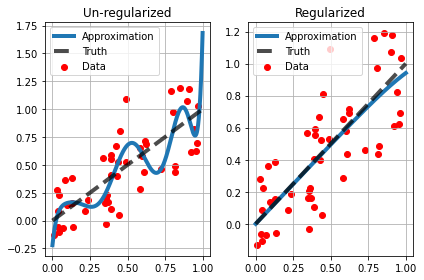

(array([-1.51564533e-04,  9.95198777e-01, -5.28431307e-03, -5.96105732e-03,
        -6.53791499e-03, -6.92078011e-03, -7.15396929e-03, -7.28947927e-03,
        -7.36058443e-03, -7.38532835e-03]),
 array([-2.20796932e-01,  1.31890136e+01, -2.04501916e+02,  1.83566303e+03,
        -1.00240784e+04,  3.30239549e+04, -6.45866410e+04,  7.28491613e+04,
        -4.36338537e+04,  1.07290109e+04]))

In [38]:
# Generate noisy observations and fit the polynomial.
n = 50
t = np.random.rand(n)
sigma = 0.5
y = t + sigma**2 * np.random.randn(n)

# Set up the prior mean and variance.
p = 10
v = np.zeros(p)
v[1] = 1
gamma = 0.1

# Compute regularized solution.
w_reg = fit(t, y, v, gamma, sigma)

# Compute un-regularized solution with gamma = infinity
w_unreg = fit(t, y, v, np.inf, sigma)

# Plot the results side by side.
tt = np.linspace(0,1,1000)

fig, ax = plt.subplots(1,2)
ax[0].plot(tt, evaluate(tt, w_unreg), lw = 4, label = 'Approximation')
ax[0].plot(tt, tt, 'k--', alpha = 0.7, lw = 4, label = 'Truth')
ax[0].scatter(t, y, color = 'r', label = 'Data')
ax[0].set_title('Un-regularized')
ax[0].legend()
ax[0].grid()

ax[1].plot(tt, evaluate(tt, w_reg), lw = 4, label = 'Approximation')
ax[1].plot(tt, tt, 'k--', alpha = 0.7, lw = 4, label = 'Truth')
ax[1].scatter(t, y, color = 'r', label = 'Data')
ax[1].set_title('Regularized')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()
w_reg, w_unreg